# K-Ближайшие соседи

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [6]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Визуализация и анализ данных
### Давайте посмотрим, сколько представителей каждого класса содержится в нашем наборе данных.

In [9]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

### Вы можете легко исследовать свои данные, используя методы визуализации:

array([[<Axes: title={'center': 'income'}>]], dtype=object)

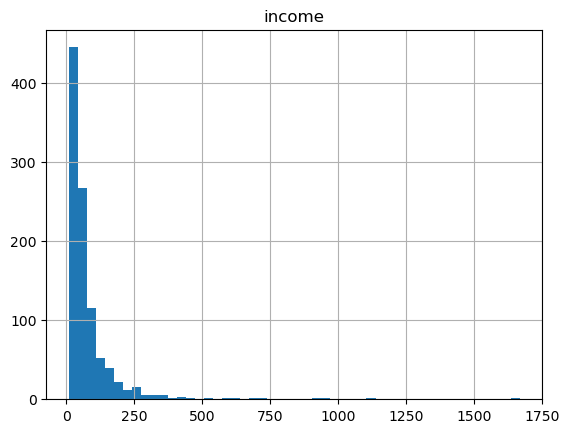

In [12]:
df.hist(column='income', bins=50)

### Набор функций
#### Давайте определим наборы функций X:

In [16]:
df.columns

Index(['Unnamed: 0', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [18]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

#### Каковы наши лейблы?

In [21]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

### Нормализовать данные
#### Стандартизация данных обеспечивает нулевое среднее значение и единичную дисперсию. Это хорошая практика, особенно для таких алгоритмов, как KNN, которые основаны на расстоянии точек данных:

In [25]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Тестовый поезд Сплит
#### Это обеспечит более точную оценку точности вне выборки, поскольку набор данных тестирования не является частью набора данных, который использовался для обучения модели. Это более реалистично для реальных проблем.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Классификация
### К ближайшего соседа (KNN)
#### Обучение

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

#### Предсказание

In [36]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

#### Оценка точности

In [39]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


## А как насчет других К?
### Мы можем рассчитать точность KNN для различных значений k.

In [53]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

### Постройте график точности модели для разного количества соседей.

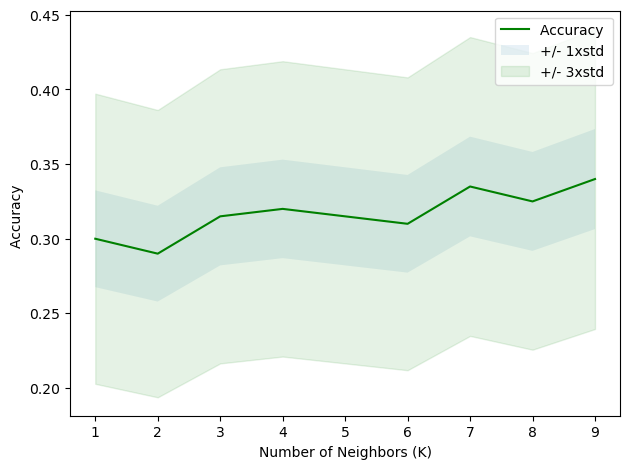

In [55]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [57]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


# Деревья решений

In [60]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [62]:
my_data.shape

(200, 6)

### Предварительная обработка
#### Удалите столбец, содержащий целевое имя, поскольку он не содержит числовых значений.

In [65]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

#### Как вы можете понять, некоторые признаки в этом наборе данных являются категориальными, например, Пол или BP. К сожалению, Sklearn Decision Trees не обрабатывает категориальные переменные. Мы все равно можем преобразовать эти признаки в числовые значения с помощью LabelEncoder, чтобы преобразовать категориальную переменную в числовые переменные.

In [68]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

#### Теперь мы можем заполнить целевую переменную.

In [71]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Настройка дерева решений
### Мы будем использовать разделение train/test на нашем дереве решений. Импортируем train_test_split из sklearn.cross_validation.

In [74]:
from sklearn.model_selection import train_test_split

#### X и y — это массивы, необходимые перед разделением, test_size представляет собой соотношение тестового набора данных, а random_state гарантирует, что мы получим те же разделения.

In [77]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

#### Распечатайте форму X_trainset и y_trainset. Убедитесь, что размеры совпадают.

In [80]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


In [82]:
print('Shape of X test set {}'.format(X_testset.shape),'&','Size of y test set {}'.format(y_testset.shape))

Shape of X test set (60, 5) & Size of y test set (60,)


## Моделировани
### Сначала мы создадим экземпляр DecisionTreeClassifier с именем drugTree.
#### Внутри классификатора укажите criteria="entropy", чтобы мы могли видеть прирост информации каждого узла.

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Далее мы подгоним данные под матрицу обучающих признаков X_trainset и вектор обучающего отклика y_trainset.

In [93]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Прогноз

In [96]:
predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Оценка

In [99]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


## Визуализация

In [104]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/anaconda-ai-2024.04-py310

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.36.0             |       h3371d22_4         560 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       h77eed37_2         1.5 MB  conda-forge
    fonts-conda-ecosystem-1    |                0           4 KB  conda-forge
    fonts-con

In [106]:
import sklearn.tree as tree

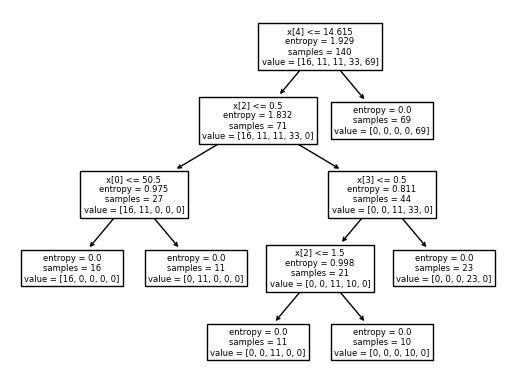

In [108]:
tree.plot_tree(drugTree)
plt.show()

# Деревья регрессии

In [36]:
!pip install sklearn==0.20.1

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
ERROR: Ignored the following yanked versions: 0.0.post2
ERROR: Could not find a version that satisfies the requirement sklearn==0.20.1 (from versions: 0.0, 0.0.post1, 0.0.post4, 0.0.post5, 0.0.post7, 0.0.post9, 0.0.post10, 0.0.post11, 0.0.post12)
ERROR: No matching distribution found for sklearn==0.20.1


In [3]:
import pandas as pd
# Regression Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
# Split our data into a training and testing data
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('data1')
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [7]:
data.shape

(506, 14)

#### Большая часть данных верна, есть строки с пропущенными значениями, с которыми мы разберемся при предварительной обработке.

In [10]:
data.isna().sum()

Unnamed: 0     0
CRIM          20
ZN            20
INDUS         20
CHAS          20
NOX            0
RM             0
AGE           20
DIS            0
RAD            0
TAX            0
PTRATIO        0
LSTAT         20
MEDV           0
dtype: int64

#### Сначала давайте удалим строки с пропущенными значениями, поскольку в нашем наборе данных достаточно данных.

In [13]:
data.dropna(inplace=True)

In [15]:
data.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

## Давайте разделим набор данных на наши признаки и то, что мы прогнозируем (цель).

In [18]:
X = data.drop(columns=["MEDV"])
Y = data["MEDV"]

In [20]:
X.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [22]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

## Создать дерево регрессии

In [48]:
regression_tree = DecisionTreeRegressor(criterion = 'mae')

###  Обучение
#### Теперь давайте обучим нашу модель, используя метод fit на объекте DecisionTreeRegressor, предоставляющем наши обучающие данные.

In [50]:
regression_tree.fit(X_train, Y_train)

/home/07831bb6-aa6d-4c77-bd9c-fe0977fc5435/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae')

### Оценка
#### Для оценки нашего набора данных мы будем использовать метод оценки объекта DecisionTreeRegressor, предоставляющего наши тестовые данные, это число — значение 𝑅2, которое указывает коэффициент детерминации

In [43]:
regression_tree.score(X_test, Y_test)

0.8259618713471544

#### Мы также можем найти среднюю ошибку в нашем тестовом наборе, которая является средней ошибкой в ​​медианном значении прогноза стоимости дома, которое указывает на коэффициент детерминации

In [46]:
prediction = regression_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

$ 2897.46835443038
